# Titanic

###### 2018/03/22

Random Forest

0.81339 (accuracy rate) ,

ranked 532nd of 10,410 teams (about 6%)

## 1. Importing libraries and Observing Data

In [1]:
import pandas as pd
import numpy as np
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import RFECV


In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:

print(train_data.columns)   #index
#print(train_data.columns.values) #Array
train_data.head()
#train_data.tail()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Markun, Mr. Johann",male,1601,G6,S
freq,1,577,7,4,644


In [7]:
train_data[["Pclass","Survived"]].groupby(['Pclass'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


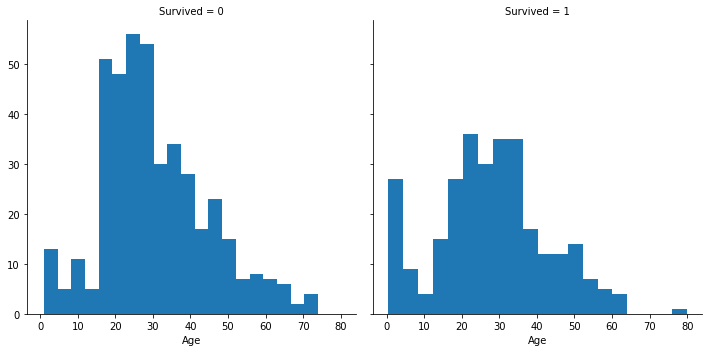

In [9]:
g = sns.FacetGrid(train_data,col='Survived',size=5)
g.map(plt.hist,'Age',bins=20)

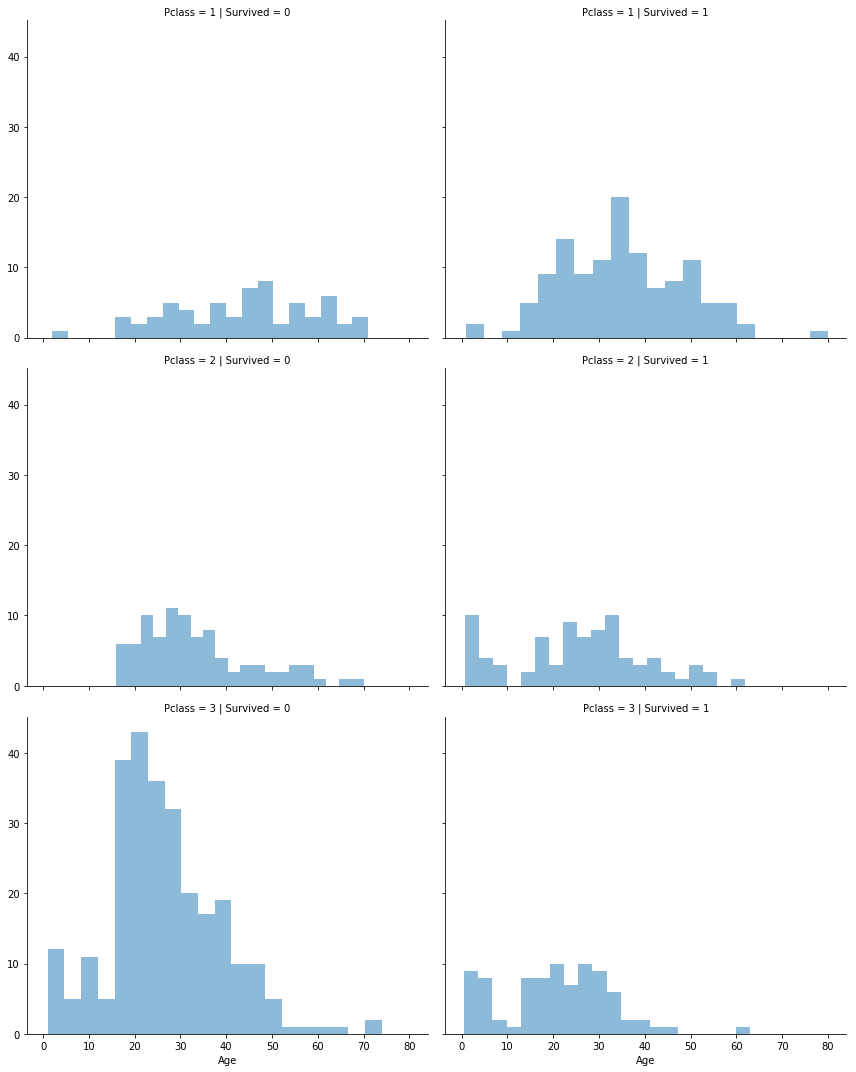

In [10]:
grid = sns.FacetGrid(train_data,col='Survived',row='Pclass',size=5,aspect=1.2)
grid.map(plt.hist,'Age',alpha=0.5,bins=20)

/Users/Ranch/.pyenv/versions/3.6.4/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/Ranch/.pyenv/versions/3.6.4/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


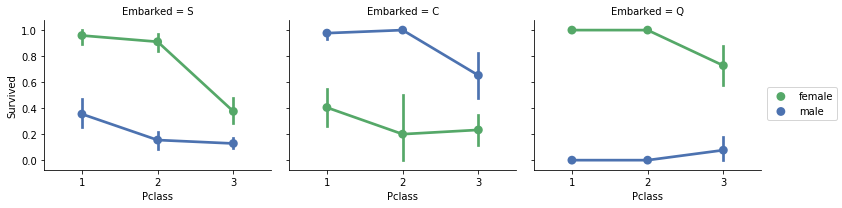

In [11]:
grid = sns.FacetGrid(train_data,col='Embarked',size=3,aspect=1.2)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

/Users/Ranch/.pyenv/versions/3.6.4/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


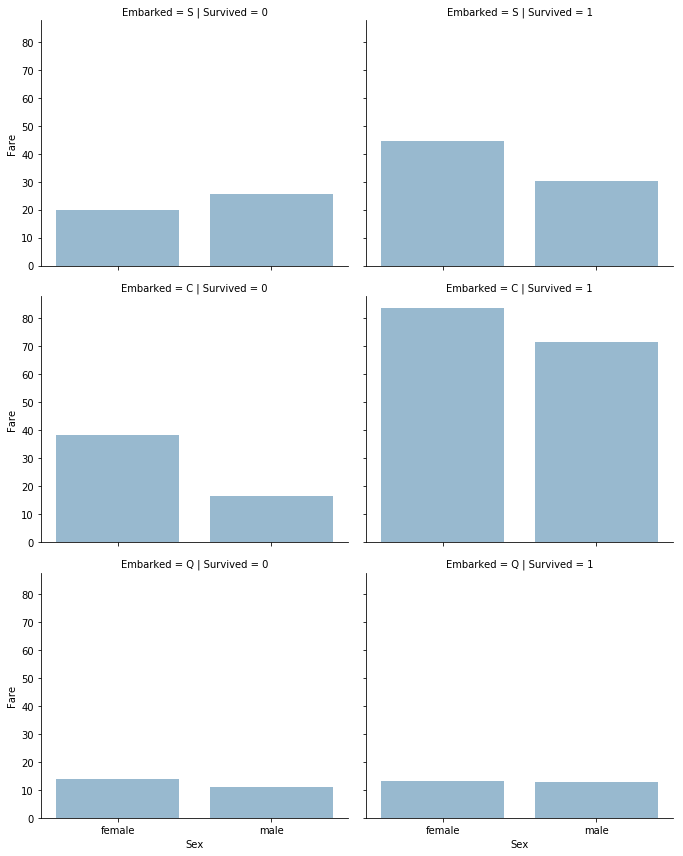

In [12]:
grid = sns.FacetGrid(train_data,row='Embarked',col='Survived',size=4,aspect=1.2)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)

## 2. Data Preprocessing

In [13]:
train_data["Cabin"] = train_data["Cabin"].notnull().astype(int)
test_data["Cabin"] = test_data["Cabin"].notnull().astype(int)
train_data = train_data.drop(["Ticket"],axis=1)
test_data = test_data.drop(["Ticket"],axis=1)

In [ ]:
#train_data = train_data.drop(["Cabin","Ticket"],axis=1)
#test_data = test_data.drop(["Cabin","Ticket"],axis=1)

###### extract titles from name columns 

In [14]:
combine = [train_data,test_data]

for data in combine:
    data["Title"] = data.Name.str.extract(' ([A-Za-z]+)\.',expand=False)   # regular expression. 
    
#pd.crosstab(train_data["Title"],train_data["Sex"])

In [15]:
for data in combine:
    data["Title"] = data["Title"].replace(['Lady',"Countess","Capt","Col","Don","Dr",\
                                          "Major","Rev","Sir","Jonkheer","Dona"],"Rare")
    data["Title"]=data["Title"].replace("Mlle","Miss")
    data["Title"]=data["Title"].replace("Ms","Miss")
    data["Title"]=data["Title"].replace("Mme","Mrs")
train_data[["Title","Survived"]].groupby("Title",as_index=False).mean().sort_values(by="Survived",ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [16]:
title_index = {"Mr": 1 ,"Miss": 2 ,"Mrs": 3 ,"Master": 4 ,"Rare": 5 }
for data in combine:
    data["Title"] = data["Title"].map(title_index)
    data["Title"] = data["Title"].fillna(0)

#train_data.head()

In [17]:
train_data =train_data.drop(["Name","PassengerId"],axis = 1)
test_data = test_data.drop(["Name"],axis=1)
#train_data.head()

###### turn sex values into number, so the algorithms can train model

In [18]:
train_data["Sex"] = train_data["Sex"].map({"male":0,"female":1})
test_data["Sex"] = test_data["Sex"].map({"male":0,"female":1})

###### filling missing age with the average age with respect to each title

In [19]:
dataset = pd.concat([train_data,test_data])

In [20]:
ageGuess = {}
for i in [1,2,3,4,5]:
    ageGuess[i] = dataset.loc[(dataset["Title"]==i)&(dataset["Age"].notnull()),"Age"].mean()
dataset.loc[dataset["Age"].isnull(),"Age"] = dataset.loc[dataset["Age"].isnull(),"Title"].map(ageGuess)

In [21]:
dataset["Age"]=pd.cut(dataset["Age"],5,labels = [0,1,2,3,4])

###### one missing fare value in test set, filling with the average amount

In [22]:
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].mean())

###### create new feature : family size

In [23]:
dataset["Family"] = dataset["Parch"] + dataset["SibSp"] + 1 # 1 for himself/herself
dataset.drop(["Parch","SibSp"],axis=1,inplace=True)

###### only two missing values with "Embarked".  filling with the most common class.

In [24]:
dataset["Embarked"] = dataset["Embarked"].fillna(dataset["Embarked"].mode()[0])
dataset["Embarked"] = dataset["Embarked"].map({"Q":0,"S":1,"C":2})

###### prepare the train and test sets

In [25]:
train = dataset[:891]
test = dataset[891:]

train = train.drop("PassengerId",axis=1)
test = test.drop("Survived",axis=1)

## 3.Training

In [ ]:
# this line can do shuffle
#train = train.sample(frac=1).reset_index(drop=True)

In [ ]:
# the line can do cross validation.
cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

###### Random Forest

In [26]:
params = {"n_estimators":[225,230,235],"max_depth":[5,6,7,8,9],
          "max_leaf_nodes":[15,17,19],"max_features":["auto",None]}

In [27]:
clf = GridSearchCV(RandomForestClassifier(), params, cv=4)  # or cv = cv_split 
clf.fit(train.drop("Survived",axis=1),train["Survived"])
clf.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 17,
 'n_estimators': 230}

###### XGBoost

In [ ]:
params = {"n_estimators":[300,500,700],
          "learning_rate":[0.1,0.3],
          "max_depth":[3,5,7],
          "reg_lambda":[75,100,150]}
clf = GridSearchCV(xgb.XGBClassifier(),params,cv=4,scoring="roc_auc")
clf.fit(train.drop("Survived",axis=1).as_matrix(),train["Survived"].as_matrix())
clf.best_params_

###### RFE practice
RFE doesn't help in this case

In [ ]:
rfe = RFECV(RandomForestClassifier(), step = 1, scoring = 'accuracy', cv = cv_split)
rfe.fit(train.drop("Survived",axis=1),train["Survived"])

X_rfe = train.drop("Survived",axis=1).columns.values[rfe.get_support()]

#rfe_results = model_selection.cross_validate(RandomForestClassifier(), train[X_rfe], train["Survived"], cv  = cv_split)
rfe_results

In [ ]:
rfe_tune_model = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring = 'roc_auc', cv = cv_split)
rfe_tune_model.fit(train[X_rfe],train["Survived"])
rfe_tune_model.best_params_

## 4.Testing

In [ ]:
sub = pd.DataFrame()
sub["PassengerId"] = test["PassengerId"].astype(int)
test = test.drop("PassengerId",axis=1)

In [ ]:
#sub["Survived"] = clf.predict(test.as_matrix()).astype(int)  # as_metrix for xgb
sub["Survived"] = clf.predict(test[X_rfe]).astype(int)

In [ ]:
sub.to_csv("sub.csv",index=False)

## 5.Ranking

2018/03/22

this random forest model achieved 0.81339 (accuracy rate) score, which ranked 532nd of 10,410 teams (about 6%)